In [2]:
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
import torch
from torch.optim.lr_scheduler import *
v = torch.autograd.Variable(torch.ones(2,2), requires_grad=True)
optimizer = torch.optim.Adam([v], lr=0.001)
optimizer.param_groups
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

## LambdaLR

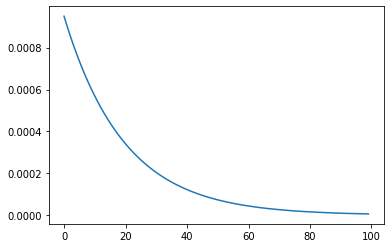

[0.00095, 0.0009025, 0.000857375]


In [4]:
lambda1 = lambda epoch: 0.95 ** epoch
scheduler = LambdaLR(optimizer, lr_lambda=lambda1)
lrs = []
for epoch in range(100):
    optimizer.step()
    scheduler.step()
    lrs.append(get_lr(optimizer))
plt.plot(range(len(lrs)), lrs)
plt.show()
print(lrs[:3])

## MultiplicativeLR

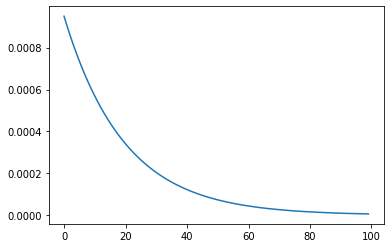

[0.00095, 0.0009025, 0.000857375]


In [7]:
lmbda = lambda epoch: 0.95
scheduler = MultiplicativeLR(optimizer, lr_lambda=lmbda, last_epoch=-1)
lrs = []
for epoch in range(100):
    optimizer.step()
    scheduler.step()
    lrs.append(get_lr(optimizer))
plt.plot(range(len(lrs)), lrs)
plt.show()
print(lrs[:3])

## CosineAnnealingLR

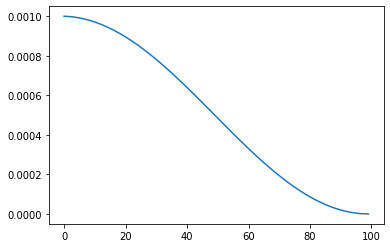

[0.0009997532801828658, 0.0009990133642141358, 0.00099778098230154]


In [8]:
scheduler = CosineAnnealingLR(optimizer, T_max=100, eta_min=0, last_epoch=-1)
lrs = []
for epoch in range(100):
    optimizer.step()
    scheduler.step()
    lrs.append(get_lr(optimizer))
plt.plot(range(len(lrs)), lrs)
plt.show()
print(lrs[:3])

## CyclicLR
* Must call step after batch update, no epoch

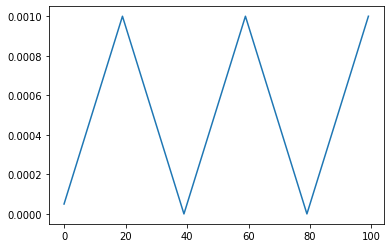

[5.0094999999999824e-05, 0.0001000900000000001, 0.00015008499999999992]


In [11]:
scheduler = CyclicLR(optimizer, base_lr=1e-7, max_lr=1e-3, step_size_up=20, step_size_down=None, mode='triangular', gamma=1.0, scale_fn=None, scale_mode='cycle', cycle_momentum=False, base_momentum=0.8, max_momentum=0.9, last_epoch=-1)
lrs = []
for batch in range(100):
    optimizer.step()
    scheduler.step()
    lrs.append(get_lr(optimizer))
plt.plot(range(len(lrs)), lrs)
plt.show()
print(lrs[:3])

## OneCycleLR

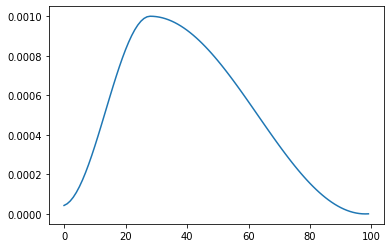

[4.281378056590743e-05, 5.122213325915845e-05, 6.512647783225487e-05]


In [13]:
scheduler = OneCycleLR(optimizer, max_lr=1e-3, total_steps=100, epochs=None, steps_per_epoch=None, pct_start=0.3, anneal_strategy='cos', cycle_momentum=False, base_momentum=0.85, max_momentum=0.95, div_factor=25.0, final_div_factor=10000.0, last_epoch=-1)
lrs = []
for batch in range(100):
    optimizer.step()
    scheduler.step()
    lrs.append(get_lr(optimizer))
plt.plot(range(len(lrs)), lrs)
plt.show()
print(lrs[:3])